In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data\\natural_disasters_raw.csv', sep=';')

In [3]:
def snake_case_all_and_remove_columns(df, keep_columns):
    columns_rename = {}
    for i in list(df.columns):
        columns_rename[i] = i.lower().replace("'", '').split(" (")[0].replace(' ', '_').replace('no_', 'nb_')
    return df[keep_columns].rename(columns=columns_rename)

In [4]:
def fillnas(df, columns_na_fills):
    for i in columns_na_fills.keys():
        df.loc[df[i].isnull(),i]=columns_na_fills[i]
    return df

In [5]:
def change_columns_type(df, cols_dict):
    for c in cols_dict.keys():
        if cols_dict[c] == 'int':
            df[c] = df[c].astype(int)
        elif cols_dict[c] == 'str':
            df[c] = df[c].astype(str)
        elif cols_dict[c] == 'float':
            df[c] = df[c].astype(float)
    return df

In [6]:
keep_cols = ['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 
             'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Continent', 'Location', 'Origin', 'Associated Dis',
             'Associated Dis2', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time',
             'River Basin',  'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day', 'Total Deaths', 
             'No Injured', 'No Affected', 'No Homeless', 'Geo Locations','Total Affected', "Reconstruction Costs ('000 US$)",
             "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]

columns_na_fills = {'start_month' : 1, 
                    'start_day' : 1, 
                    'end_month' : 1, 
                    'end_day' : 1}


change_cols = {'start_year' : 'str',
               'start_month' : 'str', 
               'start_day' : 'str', 
               'end_year' : 'str', 
               'end_month' : 'str', 
               'end_day' : 'str',
              }

In [7]:
df_clean = (df.drop_duplicates()
              .pipe(snake_case_all_and_remove_columns, keep_cols)
              .pipe(fillnas, columns_na_fills)
              #.pipe(change_columns_type, change_cols)   
              .assign(start_date = lambda df: pd.to_datetime(dict(year=df.start_year, month=df.start_month, day=df.start_day)
                                                             , format='%Y-%m-%d', errors='coerce'))
              .assign(end_date = lambda df: pd.to_datetime(dict(year=df.end_year, month=df.end_month, day=df.end_day)
                                                              , format='%Y-%m-%d', errors='coerce'))   
)

In [16]:
df_clean.country = df_clean.country.apply(lambda x: x.split('(')[0].strip())

In [18]:
df_clean.to_excel('data\\natural_disasters_clean.xlsx', index=False)

In [19]:
df_clean.query("country == 'Congo'")

,dis_no,year,seq,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,disaster_subsubtype,event_name,country,...,nb_injured,nb_affected,nb_homeless,geo_locations,total_affected,reconstruction_costs,insured_damages,total_damages,start_date,end_date
885,1990-0114-COD,1990,114,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Congo,...,500.0,15000.0,12000.0,NaN,27500.0,NaN,NaN,NaN,1990-05-20,1990-05-21
961,1991-0095-COD,1991,95,Natural,Biological,Epidemic,Viral disease,NaN,NaN,Congo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-03-01,1991-03-01
1025,1992-0064-COD,1992,64,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Congo,...,61.0,NaN,250.0,NaN,311.0,NaN,NaN,NaN,1992-09-11,1992-09-11
1427,1994-0757-COG,1994,757,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Congo,...,NaN,16500.0,NaN,NaN,16500.0,NaN,NaN,NaN,1994-12-01,1994-12-01
1807,1997-0547-COG,1997,547,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,Congo,...,NaN,485.0,NaN,NaN,485.0,NaN,NaN,NaN,1997-11-27,1998-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11738,2020-0497-COD,2020,497,Natural,Biological,Epidemic,Viral disease,NaN,Ebola,Congo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01,2020-11-11
11739,2020-0123-COD,2020,123,Natural,Hydrological,Flood,NaN,NaN,NaN,Congo,...,NaN,30000.0,NaN,Maniema (Adm1).,30000.0,NaN,NaN,NaN,2020-03-17,2020-04-01
11740,2020-0128-COD,2020,128,Natural,Hydrological,Flood,NaN,NaN,NaN,Congo,...,NaN,73000.0,NaN,Haut-Lomami (Adm2).,73000.0,NaN,NaN,NaN,2020-03-14,2020-03-18
11741,2020-0152-COD,2020,152,Natural,Hydrological,Flood,NaN,NaN,NaN,Congo,...,NaN,500.0,NaN,Ituri (Adm2).,500.0,NaN,NaN,NaN,2020-05-05,2020-05-05


In [17]:
df_clean.country.unique()

array(['Cameroon', 'Ecuador', 'Australia', 'Austria', 'Bolivia',
       'Afghanistan', 'Argentina', 'Antigua and Barbuda', 'Belgium',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahamas', 'Belize',
       'Brazil', 'Botswana', 'Canada', 'Switzerland', 'Chile', 'China',
       'Cook Islands', 'Colombia', 'Costa Rica', 'Cuba', 'Germany',
       'Denmark', 'Germany Fed Rep', 'Benin', 'C�te d?Ivoire', 'Comoros',
       'Cyprus', 'Dominican Republic', 'Algeria', 'Egypt', 'Albania',
       'Burundi', 'Bhutan', 'Central African Republic', 'Cabo Verde',
       'Belarus', 'Djibouti', 'Indonesia', 'India', 'Iran', 'Philippines',
       'Paraguay', 'Mexico', 'Peru', 'Greece', 'Namibia', 'Niger',
       'Mozambique', 'Spain', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'United Kingdom of Great Britain and Northern Ireland',
       'Guadeloupe', 'Grenada', 'Guatemala', 'Honduras', 'Haiti',
       'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kenya',
       'Saint Kitts and Nevis', 'Korea', 'Li

In [46]:
df_clean.describe()[['aid_contribution','dis_mag_value', 'total_deaths', 'nb_injured', 'nb_affected','nb_homeless','total_affected','reconstruction_costs','insured_damages','total_damages']]

,aid_contribution,dis_mag_value,total_deaths,nb_injured,nb_affected,nb_homeless,total_affected,reconstruction_costs,insured_damages,total_damages
count,6.760000e+02,4.078000e+03,8336.000000,3.020000e+03,7.326000e+03,1.824000e+03,9.181000e+03,3.100000e+01,1.029000e+03,3.935000e+03
mean,1.255957e+05,5.347265e+04,226.460173,2.687515e+03,8.269004e+05,6.388114e+04,6.734025e+05,2.392251e+06,8.370048e+05,8.773226e+05
std,3.000091e+06,3.159470e+05,4098.485790,3.712957e+04,8.262441e+06,5.350053e+05,7.475407e+06,5.229397e+06,3.147418e+06,5.393638e+06
min,1.000000e+00,-5.700000e+01,1.000000,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,8.400000e+01,3.400000e+01,2.000000e+00
25%,1.750000e+02,1.000000e+01,5.000000,1.200000e+01,1.100000e+03,5.000000e+02,6.000000e+02,1.200000e+04,5.500000e+04,1.000000e+04
50%,7.210000e+02,2.000000e+02,14.000000,4.200000e+01,9.500000e+03,2.500000e+03,5.081000e+03,1.940000e+05,2.000000e+05,9.000000e+04
75%,3.520000e+03,2.011900e+04,42.000000,1.800000e+02,8.144575e+04,1.300000e+04,5.020000e+04,1.520376e+06,5.500000e+05,4.020500e+05
max,7.800000e+07,1.302587e+07,222570.000000,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,6.000000e+07,2.100000e+08


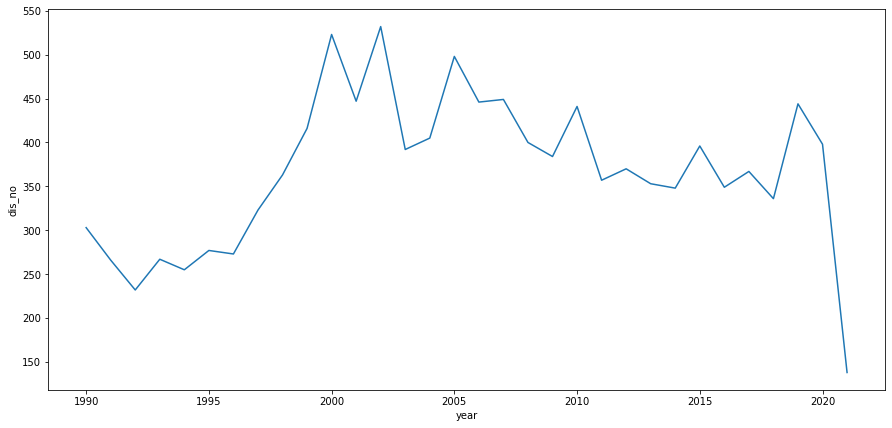

In [85]:
disasters_count_year = df_clean.groupby(['year']).count()[['dis_no']].reset_index()
fig, axes = plt.subplots()
fig.set_size_inches(15, 7)
sns.lineplot(data=disasters_count_year, x="year", y="dis_no")

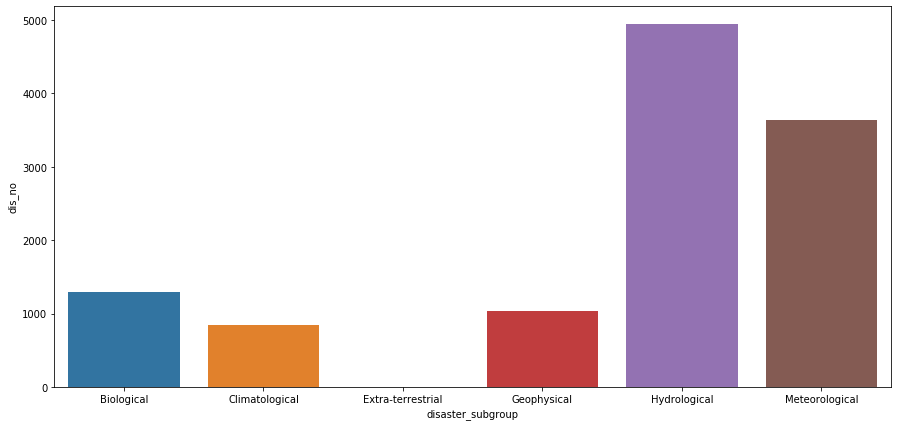

In [79]:
disasters_count = df_clean.groupby(['disaster_subgroup']).count()[['dis_no']].reset_index()
fig, axes = plt.subplots()
fig.set_size_inches(15, 7)
ax = sns.barplot(x="disaster_subgroup", y="dis_no", data=disasters_count)

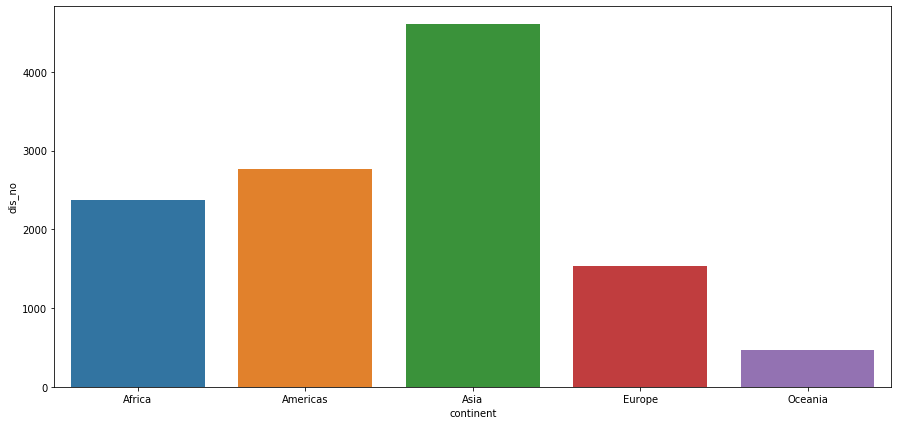

In [90]:
disasters_count_continent = df_clean.groupby(['continent']).count()[['dis_no']].reset_index()
fig, axes = plt.subplots()
fig.set_size_inches(15, 7)
ax = sns.barplot(x="continent", y="dis_no", data=disasters_count_continent)

Text(0.5, 1, 'Volume of disasters by type and year')

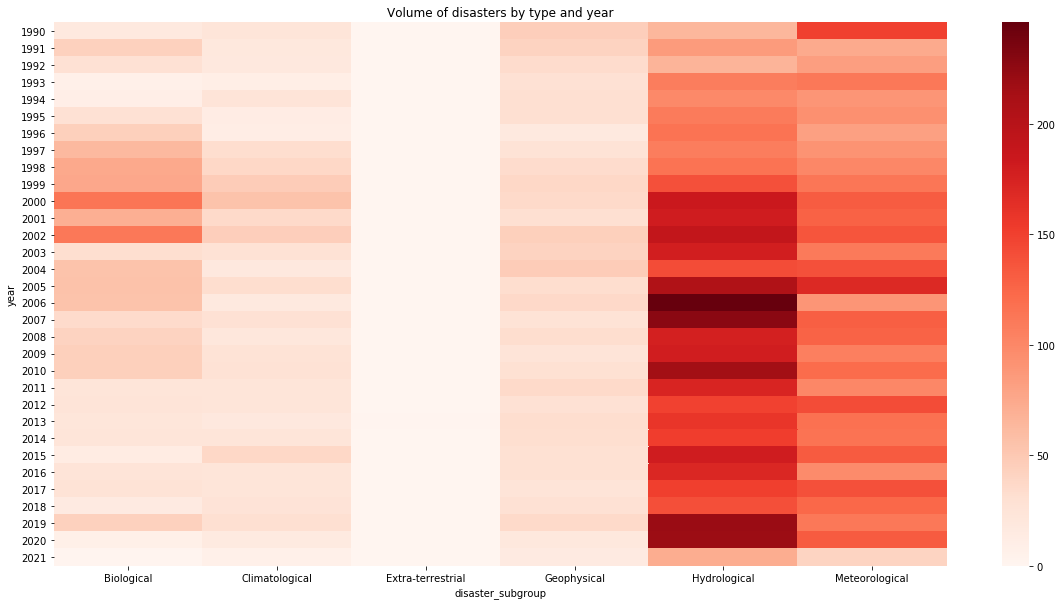

In [80]:
disaster_types_per_year = pd.crosstab(index=df_clean["year"], columns=df_clean["disaster_subgroup"])
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(disaster_types_per_year, cmap="Reds").set_title("Volume of disasters by type and year")

Text(0.5, 1, 'Volume of disasters by type and continent')

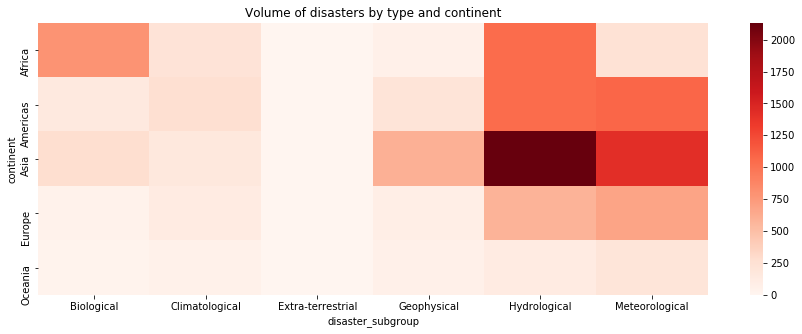

In [82]:
disaster_types_per_continent = pd.crosstab(index=df_clean["continent"], columns=df_clean["disaster_subgroup"])
fig, axes = plt.subplots()
fig.set_size_inches(15, 5)
sns.heatmap(disaster_types_per_continent, cmap="Reds").set_title("Volume of disasters by type and continent")

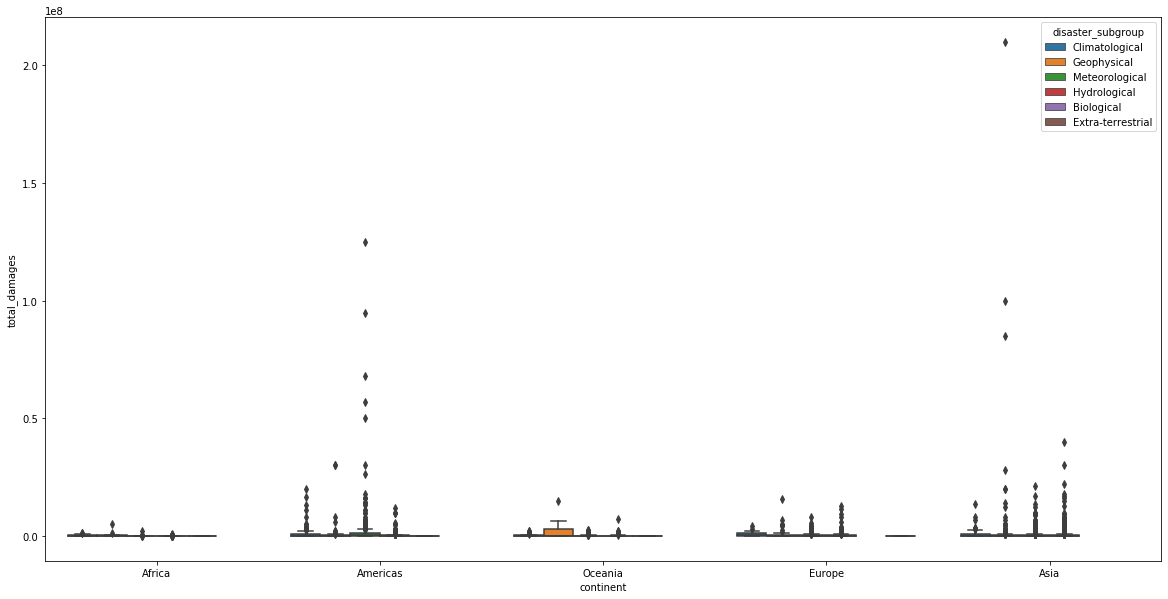

In [94]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)

sns.boxplot(x="continent", y="total_damages",hue="disaster_subgroup",data=df_clean)